**Note: This is mainly just general helper file the website is wriiten in streamlit app refer report for more deatils.**

#Importing data


In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/msrinag/pygroupprojectub/main/car_resale_prices_cleaned.csv
data = pd.read_csv("/content/car_resale_prices_cleaned.csv")
rowsload=data.shape[0]
print("Number of Rows:",rowsload) #>2000 so meets requirement for project
data.head()

--2024-05-03 18:07:19--  https://raw.githubusercontent.com/msrinag/pygroupprojectub/main/car_resale_prices_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2113976 (2.0M) [text/plain]
Saving to: ‘car_resale_prices_cleaned.csv’

car_resale_prices_c 100%[===================>]   2.02M  --.-KB/s    in 0.06s   

2024-05-03 18:07:19 (31.7 MB/s) - ‘car_resale_prices_cleaned.csv’ saved [2113976/2113976]

Number of Rows: 16598


,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,insurance_value,transmission_type_value,fuel_type_value,body_type_value,owner_type_Value
0,i Baleno 1.2 Alpha,545000.0,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra,2,1,1,1,1
1,Hexa XTA,1000000.0,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86,7.0,17.60,MUV,Agra,2,2,2,4,1
2,i Swift Dzire VXI,450000.0,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,2,1,1,2,2
3,ai i10 Magna 1.1,160000.0,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra,2,1,1,1,1
4,ai i20 Active 1.2,470000.0,2015,1197,Third Party,Manual,70000,First Owner,Petrol,81.86,5.0,17.19,Hatchback,Agra,2,1,1,1,1


#Model from Phase 2 (XGBoost)

XGBoost Regressor Mean Absolute Error: 107590.56797816265
XGBoost Regressor Mean Squared Error: 57000097154.21468
XGBoost Regressor Root Mean Squared Error: 238746.93119329237
XGBoost Regressor R-squared: 0.9295914430417505
F-Statistic: 3307.9999999999995



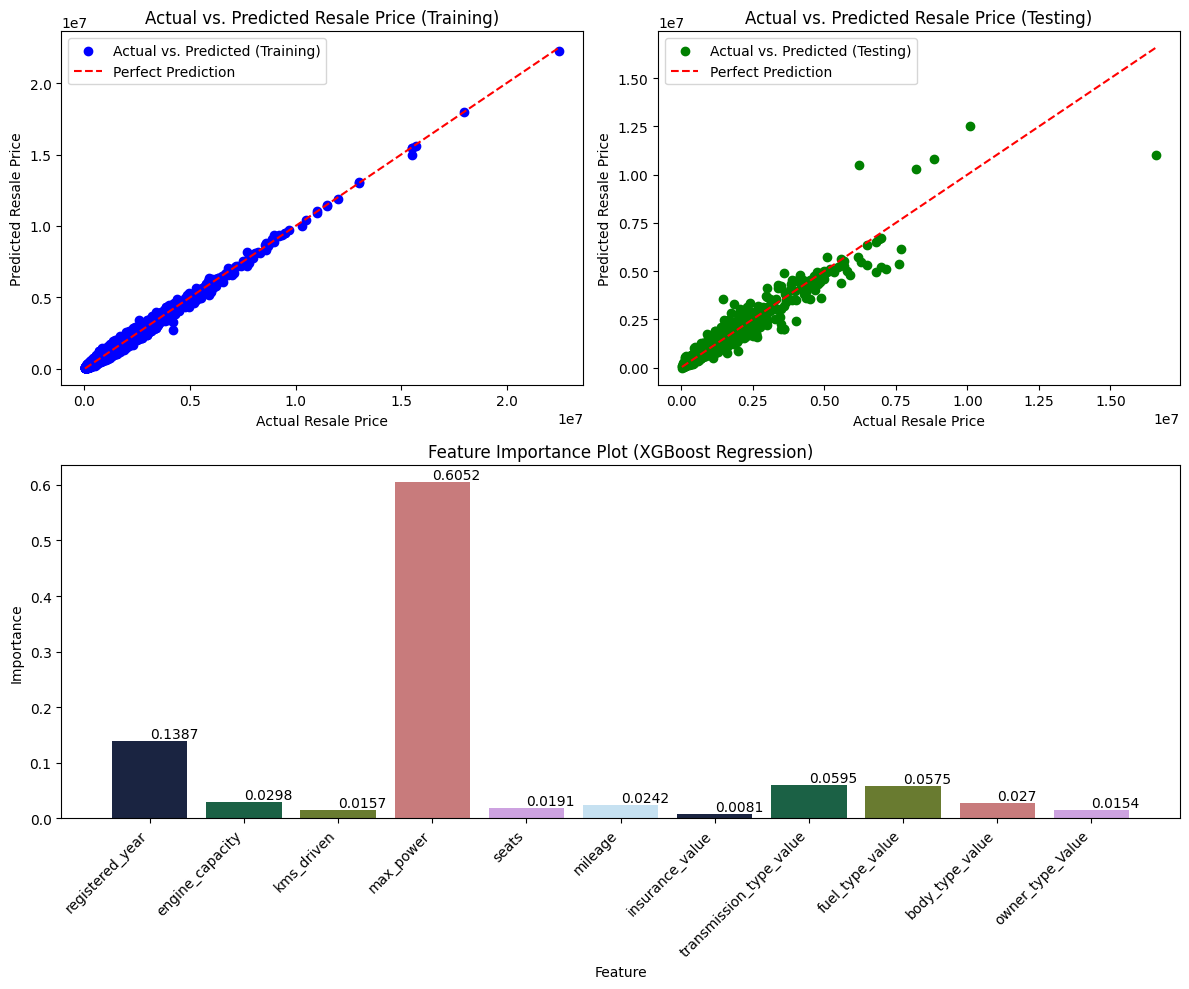

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

X = data.drop(['resale_price', 'full_name','insurance','transmission_type','owner_type','fuel_type','body_type','city'], axis=1)  # exclude features not required for model training
y = data['resale_price']  # Target variable


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Initialize and fit XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Making predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate and print evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost Regressor Mean Absolute Error: {xgb_mae}')

xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost Regressor Mean Squared Error: {xgb_mse}')

xgb_rmse = np.sqrt(xgb_mse)
print(f'XGBoost Regressor Root Mean Squared Error: {xgb_rmse}')

xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'XGBoost Regressor R-squared: {xgb_r2}')

# Calculate F-statistics
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
F_statistic = (xgb_rmse**2) / (xgb_mse / (n - k - 1))
print(f'F-Statistic: {F_statistic}')
print()  # creating space b/w graph and text

# Plotting actual vs. predicted values for training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
y_pred_train = xgb_model.predict(X_train)
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Training)')
plt.legend()

# Plotting actual vs. predicted values for testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, xgb_predictions, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs. Predicted Resale Price (Testing)')
plt.legend()

# Get feature importances from the trained model
feature_importance = xgb_model.feature_importances_
palette = sns.color_palette("cubehelix")

# Create a bar plot
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns, color=palette)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot (XGBoost Regression)')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


#we have picked up this model becuse its the best model more deatils why it is better and about parameter tuning can be found in report file

# Generating Pickle File

In [ ]:
import pickle

# Save the trained model to a file so that it can used in web application later on
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Loading the Model

In [ ]:
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
#load model

In [ ]:
input_data = [
    {
        "registered_year": 2016,
        "engine_capacity": 814,
        "kms_driven": 68336.4,
        "max_power": 55,
        "seats": 5,
        "mileage": 21,
        "insurance_value": 2,
        "transmission_type_value": 1.2,
        "fuel_type_value": 1,
        "body_type_value": 1,
        "owner_type_Value": 2
    },
    {
       "registered_year": 2016,
        "engine_capacity": 8140,
        "kms_driven": 68336.4,
        "max_power": 55,
        "seats": 5,
        "mileage": 21,
        "insurance_value": 2,
        "transmission_type_value": 1.2,
        "fuel_type_value": 1,
        "body_type_value": 1,
        "owner_type_Value": 2
    }
]

# Convert the list of dictionaries into a DataFrame
input_df = pd.DataFrame(input_data)

predictions = loaded_model.predict(input_df)
print("Predictions for the input data:", predictions)# test with multiple data this can be used for batch processing

Predictions for the input data: [ 333130.34 1053101.1 ]


In [ ]:
input_df
# our input will not be in this format since user will not be expected to input encoded values for engine captcity etc

#Encode data from user input to model input format

In [ ]:
insurance_mapping = {'Zero Dep':6,'Comprehensive': 5, 'First Party': 4, 'Second Party':3,'Third Party': 2, 'Not Available': 1}
transition_mapping = {'Manual': 1, 'Automatic': 2}
fuel_mapping = {'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5}
body_mapping = {'Hatchback': 1, 'Sedan': 2, 'SUV': 3, 'MUV': 4, 'Minivans': 5, 'unknown_type': 6, 'Pickup': 7,'Coupe':8,'Convertibles':9}
Owner_mapping = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fifth Owner':5, 'Fourth Owner':4}
def map_data_to_model(data):
  data['insurance_value']=data['insurance_value'].map(insurance_mapping)
  data['transmission_type_value'] = data['transmission_type_value'].map(transition_mapping)
  data['fuel_type_value'] = data['fuel_type_value'].map(fuel_mapping)
  data['body_type_value'] = data['body_type_value'].map(body_mapping)
  data['owner_type_Value'] = data['owner_type_Value'].map(Owner_mapping)
  return data
  # helper funciton to convert ot model style data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/msrinag/Price_Master/main/Resources/Price_Master_sample_template.csv')
df#before user friednly data

,name,registered_year,engine_capacity,kms_driven,max_power,seats,mileage,insurance_value,transmission_type_value,fuel_type_value,body_type_value,owner_type_Value
0,omini,2016,814,68336.4,55,5,21,Comprehensive,Manual,Diesel,Sedan,Second Owner
1,swift,2016,8140,68336.4,55,5,21,First Party,Automatic,Petrol,Hatchback,First Owner


In [ ]:
df=map_data_to_model(df)
df#after model specific df

,name,registered_year,engine_capacity,kms_driven,max_power,seats,mileage,insurance_value,transmission_type_value,fuel_type_value,body_type_value,owner_type_Value
0,omini,2016,814,68336.4,55,5,21,5,1,2,2,2
1,swift,2016,8140,68336.4,55,5,21,4,2,1,1,1


In [ ]:
df#after

,name,registered_year,engine_capacity,kms_driven,max_power,seats,mileage,insurance_value,transmission_type_value,fuel_type_value,body_type_value,owner_type_Value
0,omini,2016,814,68336.4,55,5,21,5,1,2,2,2
1,swift,2016,8140,68336.4,55,5,21,4,2,1,1,1


In [ ]:
loaded_model.predict(df.drop(columns=['name']))
#predictions are good from file aswell

array([ 298003.62, 1234751.8 ], dtype=float32)

## Code for batch processing NaN when User uploads Unwanted Data in Input File

In [ ]:
def nacheck(df):
    na_mask = df.isna().any(axis=1)
    if na_mask.any():
    # Print the row numbers where missing values exist
        print("Recheck values for Rows: "+" ".join(map(str,na_mask[na_mask].index)))

#model is stabel enough to predcit even if certian col are not usuable still we wanted to indcate it to user so that data can be corrected

#ex for error ouput

input_data = [
    {
        "registered_year": 2016,
        "engine_capacity": 814,
        "kms_driven": 68336.4,
        "max_power": 55,
        "seats": 5,
        "mileage": 21,
        "insurance_value": 2,
        "transmission_type_value": pd.NA,
        "fuel_type_value": 1,
        "body_type_value": 1,
        "owner_type_Value": 2
    },
    {
       "registered_year": 2016,
        "engine_capacity": 8140,
        "kms_driven": 68336.4,
        "max_power": 55,
        "seats": pd.NA,
        "mileage": 21,
        "insurance_value": 2,
        "transmission_type_value": 1.2,
        "fuel_type_value": 1,
        "body_type_value": 1,
        "owner_type_Value": 2
    }
]
input_df = pd.DataFrame(input_data)
input_df.head()



,registered_year,engine_capacity,kms_driven,max_power,seats,mileage,insurance_value,transmission_type_value,fuel_type_value,body_type_value,owner_type_Value
0,2016,814,68336.4,55,5,21,2,<NA>,1,1,2
1,2016,8140,68336.4,55,<NA>,21,2,1.2,1,1,2


In [ ]:
nacheck(input_df)

Recheck values for Rows: 0 1
